<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**Obiettivo:** creare un modello predittivo per risolvere un problema di classificazione attraverso l'utilizzo di KNN, seguendo la pipeline vista a lezione.
 

**Dataset:**
Il dataset da utilizzare contiene i risultati dell’analisi chimica di vini prodotti da tre diversi coltivatori Italiani: dovrai capire il tipo di vino a partire dai suoi valori chimici.

In [1]:
# Import Sklearn
from sklearn import datasets 

In [2]:
# Import dataset
data = datasets.load_wine() 

# Attributes 
data.keys()

# Print Data and other attributes 
print(data["target"])

print(data["target_names"])


print(data["feature_names"])

# Data shape 
data['data'].shape


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
['class_0' 'class_1' 'class_2']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


(178, 13)

In [3]:
# estraggo la matrice delle feature e il vettore delle etichette

X = data["data"]
y = data["target"]

print('X shape:', X.shape, 'y shape:', y.shape)

X shape: (178, 13) y shape: (178,)


In [4]:
# Shuffle
import numpy as np
from numpy.random import default_rng

rnd = default_rng(seed = 12)

rnd.shuffle(X)
rnd.shuffle(y)


In [5]:
# Import split function from SKL
from sklearn.model_selection import train_test_split

# Split Train and Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_test.shape)





(59, 13)


In [6]:
# KNN Implementation 
from sklearn.neighbors import KNeighborsRegressor # Alternative version with function
knn_model = KNeighborsRegressor(n_neighbors=3)

# Fit the model
knn_model.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=3)

In [7]:
# Prendere x_new e y_new dal test # Alternative method

x_new = X_test[0]
y_new = y_test[0]

x_tr_i = X_train[10] # Prendo un punto dal train 

distanza = np.linalg.norm(x_new - x_tr_i)

print(distanza)


#calcolo della distanza euclidea tra due punti inizialmente

sum_ = 0 

for j in range(0, len(x_tr_i)):
  sum_ = sum_ + (x_new[j] - x_tr_i[j])**2

distanza2 = np.sqrt(sum_)
distanza2

# List Method 
distanza_list = []

for x_tr_i in X_train:
  d = np.sqrt(np.sum((x_new - x_tr_i)**2))
  distanza_list.append(d)

distanza_list

130.4813756825088


[181.61517805513944,
 188.03954504305736,
 181.29237683918208,
 71.72164387407751,
 1010.1881908337674,
 33.1162558270104,
 650.8534815916713,
 153.19425805166458,
 560.0889967674781,
 820.7539746477016,
 130.4813756825088,
 43.115082047933065,
 109.05832980565951,
 335.0448034218707,
 536.0651651618485,
 77.1598140225856,
 103.71591247248418,
 950.1127234175954,
 330.0546406278815,
 182.50548758872978,
 47.306748989969705,
 515.8289666158736,
 31.242631131196365,
 137.74940435442906,
 91.07583049305671,
 146.4563644912709,
 67.22712101525693,
 550.6544897664959,
 580.1639053750242,
 685.3891314428614,
 154.92700894292125,
 380.34809872010663,
 44.82064925901899,
 133.44148455409209,
 345.21310273510767,
 346.1310215799792,
 121.61991448771866,
 560.3942212407262,
 127.9879166171557,
 690.1910557954225,
 535.7647275623882,
 75.05487059478551,
 157.2442142019858,
 785.5842383856743,
 43.817802318235906,
 128.10886152019305,
 114.54819247810067,
 46.22020012938066,
 100.73708304293906,
 

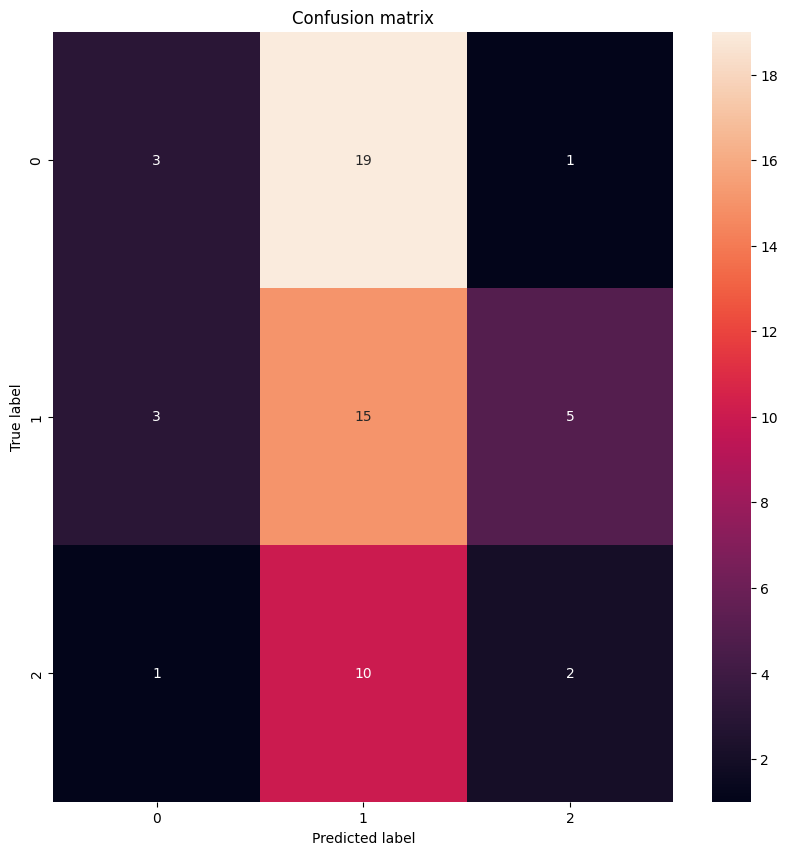

In [8]:
# Trovare K vicini
k = 4

np.sort(distanza_list)[:k]


k_neighbors = np.argsort(distanza_list)[:k]
k_neighbors


# Filter 
y_train[k_neighbors]

# Quante volte si ripete 
occorrenze = np.bincount(y_train[k_neighbors], minlength = 3)
occorrenze

# Tipo di vino
y_new_pred = np.argmax(occorrenze)
y_new_pred

# Accuracy
from sklearn.metrics import accuracy_score

y_pred = knn_model.predict(X_test)
y_pred = np.round(y_pred)

accuracy_score(y_test, y_pred)

# Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

